In [1]:
#Importing neccessary libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
#Importing the excel file, which already contains information about the age of the individual, and the distance 
#between municipality where candidates run (given by latitude_run longitude_run pair) and the municipality where the
#candidate is born (which is given by latitude-longitude pair).
data = pd.read_excel('Age_Distance_Appended.xlsx')
data.shape

(358554, 27)

In [3]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
data.drop(columns=['lati_run', 'longi_run', 'latitude', 'longitude', 'electiondate','dlati', 'dlongi'])
data.head()

,cargo,cd_situation,civil_status,date_birth,descript_situation,descript_situation_cand,description_occup,education,nationality,nr_candidate,partido,round,sex_descrip,term,female,lati_run,longi_run,latitude,longitude,same_state,same_muni,id,electiondate,age,dlati,dlongi,distance_km
0,VEREADOR,1.0,SOLTEIRO(A),1989-02-14,eleito,DEFERIDO,produtor agropecuario,superior incompleto,BRASILEIRA NATA,4195,PSDB,1,MASCULINO,2008,0,-8.761945,-63.903889,-11.968056,-61.954166,1,1,1,2008-05-10,19,-3.206111,1.949722,413.933812
1,VEREADOR,2.0,CASADO(A),1979-11-18,suplente,DEFERIDO,agricultor,ensino fundamental completo,BRASILEIRA NATA,791,PR,1,MASCULINO,2008,0,-11.968056,-61.954166,-11.968056,-61.954166,1,1,1,2008-05-10,28,0.000000,0.000000,0.000000
2,VEREADOR,2.0,SOLTEIRO(A),1989-12-18,suplente,DEFERIDO,outros,ensino medio incompleto,BRASILEIRA NATA,1935,PDT,1,MASCULINO,2008,0,-10.294444,-63.325279,-9.913333,-63.040833,1,1,1,2008-05-10,18,0.381111,0.284447,52.430392
3,VEREADOR,2.0,SOLTEIRO(A),1989-09-28,suplente,DEFERIDO,telefonista,ensino medio incompleto,BRASILEIRA NATA,4179,PTB,1,FEMININO,2008,1,-9.913333,-63.040833,-9.913333,-63.040833,1,1,1,2008-05-10,18,0.000000,0.000000,0.000000
4,VEREADOR,2.0,CASADO(A),1974-02-13,suplente,DEFERIDO,agricultor,superior incompleto,BRASILEIRA NATA,4145,PMDB,1,MASCULINO,2008,0,-10.525000,-62.643890,-9.913333,-63.040833,1,1,1,2008-05-10,34,0.611667,-0.396942,80.428729


In [4]:
groupby_gender = data.groupby('sex_descrip')
for gender, value in groupby_gender['age']:
    print((gender, value.mean()))

('FEMININO', 42.9180141138271)
('MASCULINO', 43.5503712235315)


From the numbers above, we see that the mean age when running for the position for males and females is quite close, so there is no interesting difference.

In [5]:
groupby_gender = data.groupby('sex_descrip')
for gender, value in groupby_gender['distance_km']:
    print((gender, value.mean()))

('FEMININO', 172.850428794415)
('MASCULINO', 165.5264718014423)


In [25]:
groupby_cargo = data.groupby('cargo')
for cargo, value in groupby_cargo['distance_km']:
    print((cargo, value.mean()))

('PREFEITO', 165.8056941897155)
('VEREADOR', 167.80897463930927)
('VICE-PREFEITO', 153.13931809026096)


Again, no noticable difference between the distances for different genders.

C:\Users\Asus UX310\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


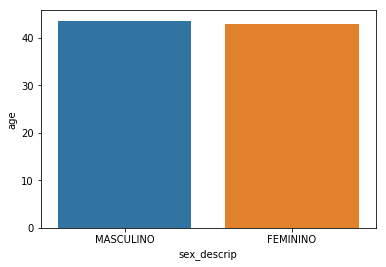

In [6]:
import seaborn as sns
sns.barplot(x='sex_descrip', y='age', data=data) 

C:\Users\Asus UX310\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


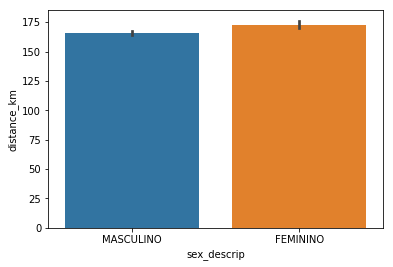

In [7]:
import seaborn as sns
sns.barplot(x='sex_descrip', y='distance_km', data=data) 

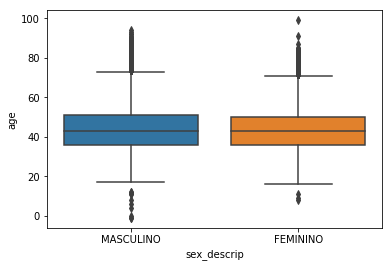

In [8]:
sns.boxplot(x='sex_descrip', y='age', data=data) 
#graphing by quartiles of age

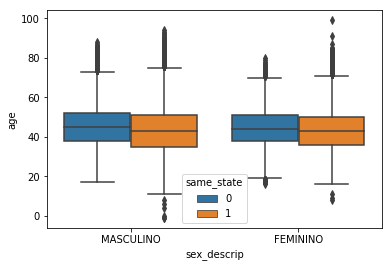

In [9]:
sns.boxplot(x='sex_descrip', y='age', data=data, hue="same_state")  

Now in addition to the information about the age of each gender, you can also see the distribution of the invididuals running in the same state or running in another state.

C:\Users\Asus UX310\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


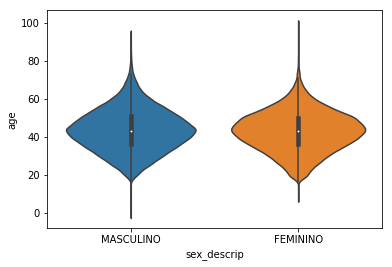

In [10]:
sns.violinplot(x='sex_descrip', y='age', data=data) 

You can see from the figure above that violin plots provide much more information about the data as compared to the box plot. Instead of plotting the quartile, the violin plot allows us to see all the components that actually correspond to the data. The area where the violin plot is thicker has a higher number of instances for the age. 

C:\Users\Asus UX310\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


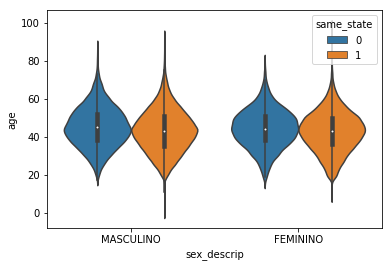

In [11]:
sns.violinplot(x='sex_descrip', y='age', data=data, hue='same_state')  

From the graph above, we can see not only the distributions of age by the gender, but also it's comparison to the ones who run in the same state and who did not run in the same state.

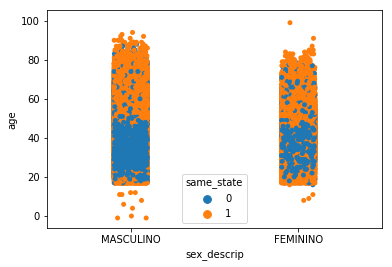

In [12]:
sns.stripplot(x='sex_descrip', y='age', data=data, jitter=True, hue='same_state') 

This graph provides more insight. As we can see, that males, who are 20-50 years old are more likely to run in another state, while males with age less than 20 and more than 50 are more likely to tun in the same state. For females, this effect is also present, hwoever, very vague. This notion can be explained by the belief that people aged 20-50 are not afraid to get out of the comfort zone and try to build their career outside their state, while for unexperienced or older people, it is the opposite, as they would generaly like to return their state to be in a a more comfortable and less "risky" situation. But, let's graph separately the distributions, to see if this effect holds.

C:\Users\Asus UX310\Anaconda3\lib\site-packages\seaborn\categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


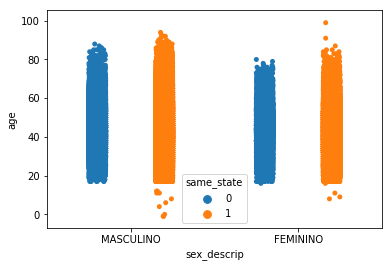

In [13]:
sns.stripplot(x='sex_descrip', y='age', data=data, jitter=True, hue='same_state', split=True) 

As we can see from this graph and the violin graph, the observation mentioned above is not valid, as the distribution do imply other result. There is no pattern for males choosing to run in the same state or not run in the same state according to any age difference.  

In [14]:
data['cargo'].value_counts()

VEREADOR         327704
VICE-PREFEITO     15569
PREFEITO          15281
Name: cargo, dtype: int64

In [15]:
data['civil_status'].value_counts()

CASADO(A)                    225705
SOLTEIRO(A)                   97532
DIVORCIADO(A)                 18697
SEPARADO(A) JUDICIALMENTE      9936
VIÃVO(A)                      6684
Name: civil_status, dtype: int64

In [16]:
data['nationality'].value_counts()

BRASILEIRA NATA                         357039
BRASILEIRA (NATURALIZADA)                 1451
PORTUGUESA COM IGUALDADE DE DIREITOS        64
Name: nationality, dtype: int64

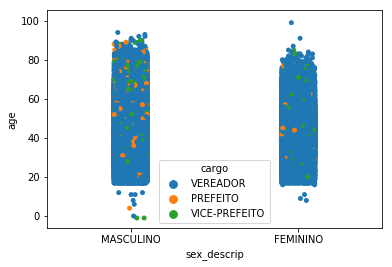

In [17]:
sns.stripplot(x='sex_descrip', y='age', data=data, jitter=True, hue='cargo') 

C:\Users\Asus UX310\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


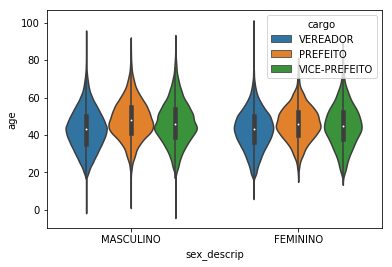

In [18]:
sns.violinplot(x='sex_descrip', y='age', data=data, hue='cargo') 

C:\Users\Asus UX310\Anaconda3\lib\site-packages\seaborn\categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


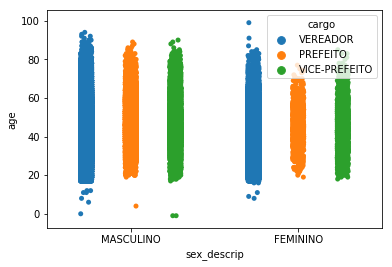

In [19]:
sns.stripplot(x='sex_descrip', y='age', data=data, jitter=True, hue='cargo', split=True) 

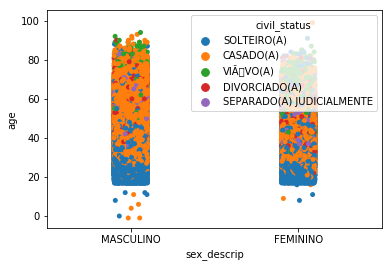

In [20]:
sns.stripplot(x='sex_descrip', y='age', data=data, jitter=True, hue='civil_status') 

C:\Users\Asus UX310\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


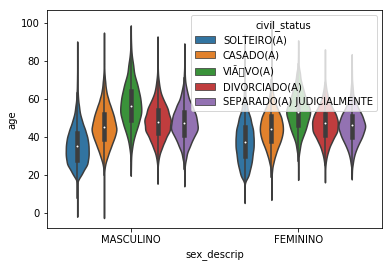

In [22]:
sns.violinplot(x='sex_descrip', y='age', data=data, hue='civil_status') 

From the graph we can see that for the civil status "VIÃVO" for males the running age is a little higher than of the other civil statuses.For women, we can see that there is no significant difference in distribution. 

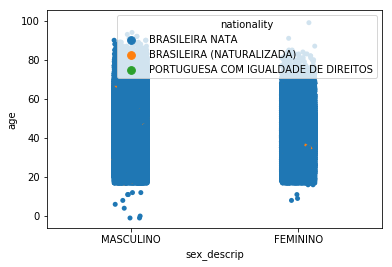

In [21]:
sns.stripplot(x='sex_descrip', y='age', data=data, jitter=True, hue='nationality') 

C:\Users\Asus UX310\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


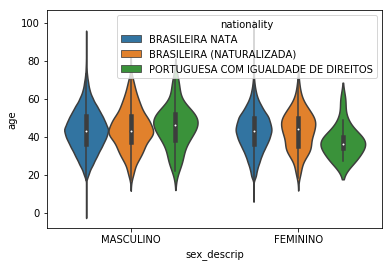

In [23]:
sns.violinplot(x='sex_descrip', y='age', data=data, hue='nationality') 